In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
dfTrain = pd.read_csv('train.csv', delimiter=',')
dfTest = pd.read_csv('test.csv', delimiter=',')

In [26]:
dfTest["SalePrice"]=np.nan

In [28]:
dfGlobal=pd.concat([dfTrain,dfTest])
iDs=dfGlobal["Id"]
dfGlobal=dfGlobal.drop(columns=["Id"])

In [29]:
dfGlobal.sample(10).transpose()

,1378,545,685,1022,1405,355,323,1081,963,1260
MSSubClass,160,50,160,50,120,30,70,20,50,60
MSZoning,RM,RL,RL,RM,RM,RM,RL,RL,RL,RL
LotFrontage,21,NaN,NaN,52,44,60,80,75,NaN,NaN
LotArea,1953,13837,5062,9439,3842,8520,8146,7500,12099,24682
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,Reg,IR1,Reg,Reg,Reg,IR1,IR3
LandContour,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,Corner,CulDSac,Inside,Inside,Inside,Corner,Corner,Inside,CulDSac


In [186]:
def prepareVariablesExplicatives(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    colonnesNumeriques=set(df.select_dtypes(include=numerics).columns)-set(["SalePrice"])
    display(df[colonnesNumeriques].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8))
    dfFiltre=df[colonnesNumeriques].fillna(0)
    dfFiltre=pd.concat([df[["SalePrice"]],dfFiltre], axis=1)
    colonnesAutres=set(df.columns)-set(list(colonnesNumeriques)+["SalePrice"])
    dfNum=dfFiltre
    for c in colonnesAutres:
        dfNum=pd.concat([dfNum,pd.get_dummies(df[c])],axis=1)
    return dfNum    

array([[<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'YrSold'}>],
       [<AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'MiscVal'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'GrLivAre

,SalePrice,FullBath,PoolArea,KitchenAbvGr,LotArea,TotRmsAbvGrd,YrSold,GarageCars,LowQualFinSF,BsmtFullBath,...,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Ex,Fa,Gd,TA
0,208500.0,2,0,1,8450,8,2008,2.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,181500.0,2,0,1,9600,6,2007,2.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,223500.0,2,0,1,11250,6,2008,2.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,140000.0,1,0,1,9550,7,2006,3.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,250000.0,2,0,1,14260,9,2008,3.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,1,0,1,1936,5,2006,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
1455,NaN,1,0,1,1894,6,2006,1.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
1456,NaN,1,0,1,20000,7,2006,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
1457,NaN,1,0,1,10441,6,2006,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1


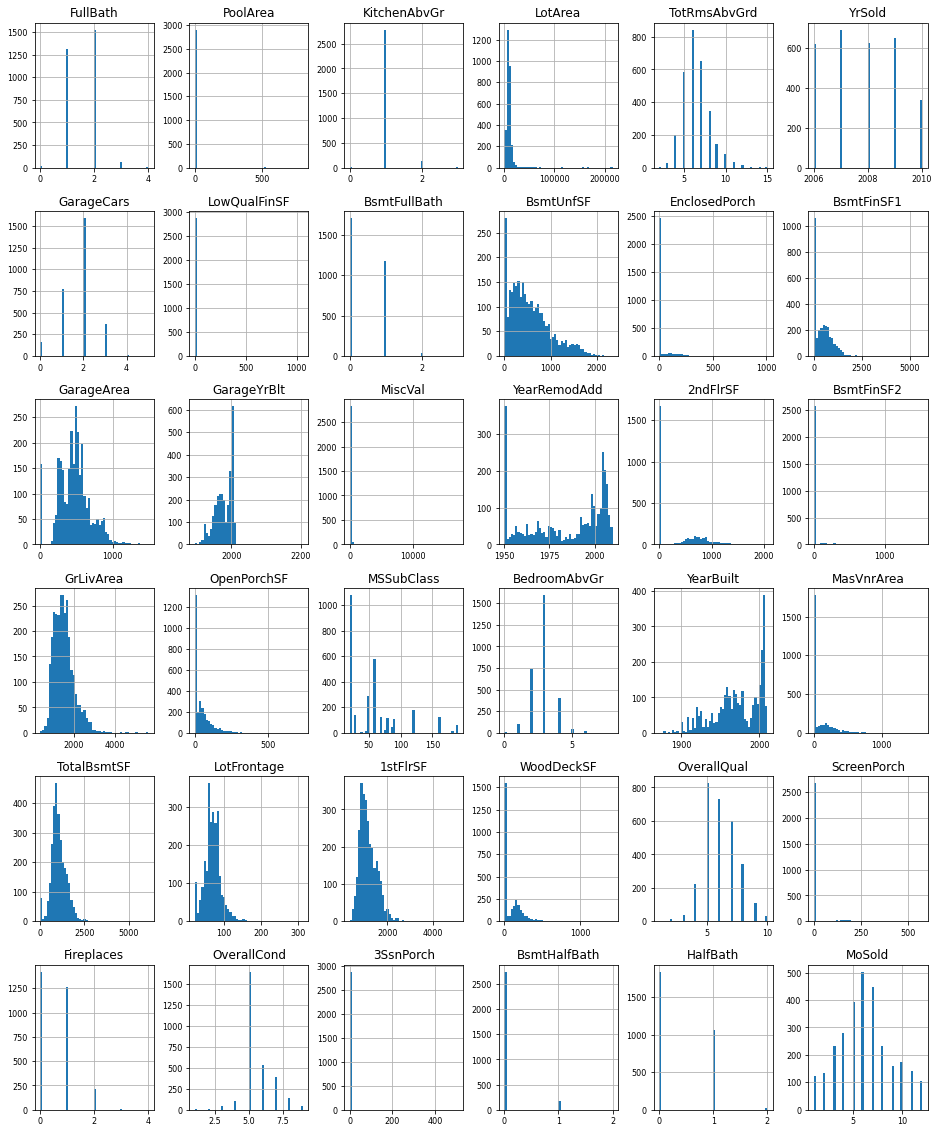

In [187]:
dfNumGlobal=prepareVariablesExplicatives(dfGlobal)
dfNumGlobal

In [32]:
dfNumFit=dfNumGlobal.dropna(subset=["SalePrice"])
dfNumFit

,SalePrice,FullBath,PoolArea,KitchenAbvGr,LotArea,TotRmsAbvGrd,YrSold,GarageCars,LowQualFinSF,BsmtFullBath,...,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Ex,Fa,Gd,TA
0,208500.0,2,0,1,8450,8,2008,2.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,181500.0,2,0,1,9600,6,2007,2.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,223500.0,2,0,1,11250,6,2008,2.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,140000.0,1,0,1,9550,7,2006,3.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,250000.0,2,0,1,14260,9,2008,3.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,2,0,1,7917,7,2007,2.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
1456,210000.0,2,0,1,13175,7,2010,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
1457,266500.0,2,0,1,9042,9,2010,1.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1458,142125.0,1,0,1,9717,5,2010,1.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0


# avec regression linéaire

In [170]:
from sklearn.linear_model import LinearRegression
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]
reg = LinearRegression().fit(X, y)
display(reg.score(X, y))

0.9332199964433194

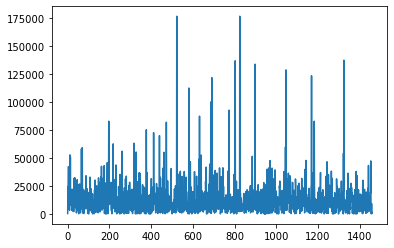

In [171]:
plt.plot(abs(y-reg.predict(X)))

In [172]:
mae = abs(y-reg.predict(X)).mean()
print("The mean absolute error on training set: {:.4f}".format(mae))

The mean absolute error on training set: 13218.4441


In [173]:
dfNumTest=dfNumGlobal

In [174]:
predictions=reg.predict(dfNumTest.values[:,1:])
predictions.squeeze()

array([208840.1784363 , 205493.71983047, 205985.69136487, ...,
       176182.97679121, 115241.06843506, 223338.05713344])

# Avec xgboost

In [175]:
# import xgboost as xgb
# reg = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     max_depth=500,
#     n_estimators=500
# )

In [176]:
# X = dfNumFit.values[:,1:]
# X = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
# y = dfNumFit.values[:,:1]

# reg.fit(X, y)


In [177]:
# mae = abs(y-reg.predict(X)).mean()
# print("The mean absolute error on training set: {:.4f}".format(mae))

# Soumission

In [178]:
dfSoumission=pd.DataFrame({"Id":iDs, "SalePrice":list(predictions.squeeze())})
dfSoumission

,Id,SalePrice
0,1,208840.178436
1,2,205493.719830
2,3,205985.691365
3,4,165306.991964
4,5,292368.719581
...,...,...
1454,2915,84426.908196
1455,2916,80570.507449
1456,2917,176182.976791
1457,2918,115241.068435


In [179]:
dfSoumission=dfSoumission[dfSoumission["Id"].isin(dfTest.Id.values)]

In [180]:
dfSoumission.to_csv("my_submission.csv", sep=',', index=False)